In [1]:
import os
os.chdir('../')

In [ ]:
!ls /data/score_sde_outputs/checkpoint_8/rbf_ecp_marginal_
!ls /data/score_sde_outputs/checkpoint_8/rbf_ecp_marginal_xt_5

sample.png  samples_0.npz
sample.png  samples_0.npz


In [29]:
import numpy as np
import torch
import torch.nn.functional as F

def get_traj(npz):
    data = np.load(npz)
    print(list(data.keys()))
    target_traj, model_traj, _ = data['hist']
    return target_traj, model_traj

target_traj, model_traj = get_traj('/data/score_sde_outputs/checkpoint_8/UniPC_bh1_200/samples_0.npz')
target_traj = target_traj[:, 0, 1, 16, 16]
model_traj = model_traj[:, 0, 1, 16, 16]
print(target_traj.shape, model_traj.shape)


['samples', 'timesteps', 'hist', 'samples_raw']
(201,) (201,)


In [33]:
bytarget_trajs = []
bymodel_trajs = []
for NFE in [5, 6, 8, 10]:
    _, bytarget_traj = get_traj(f'/data/score_sde_outputs/checkpoint_8/rbf_ecp_marginal_{NFE}/samples_0.npz')
    bytarget_trajs.append(bytarget_traj[:, 0, 1, 16, 16])

    _, bymodel_traj = get_traj(f'/data/score_sde_outputs/checkpoint_8/rbf_ecp_marginal_xt_{NFE}/samples_0.npz')
    bymodel_trajs.append(bymodel_traj[:, 0, 1, 16, 16])


['samples', 'timesteps', 'hist', 'samples_raw']
['samples', 'timesteps', 'hist', 'samples_raw']
['samples', 'timesteps', 'hist', 'samples_raw']
['samples', 'timesteps', 'hist', 'samples_raw']
['samples', 'timesteps', 'hist', 'samples_raw']
['samples', 'timesteps', 'hist', 'samples_raw']
['samples', 'timesteps', 'hist', 'samples_raw']
['samples', 'timesteps', 'hist', 'samples_raw']


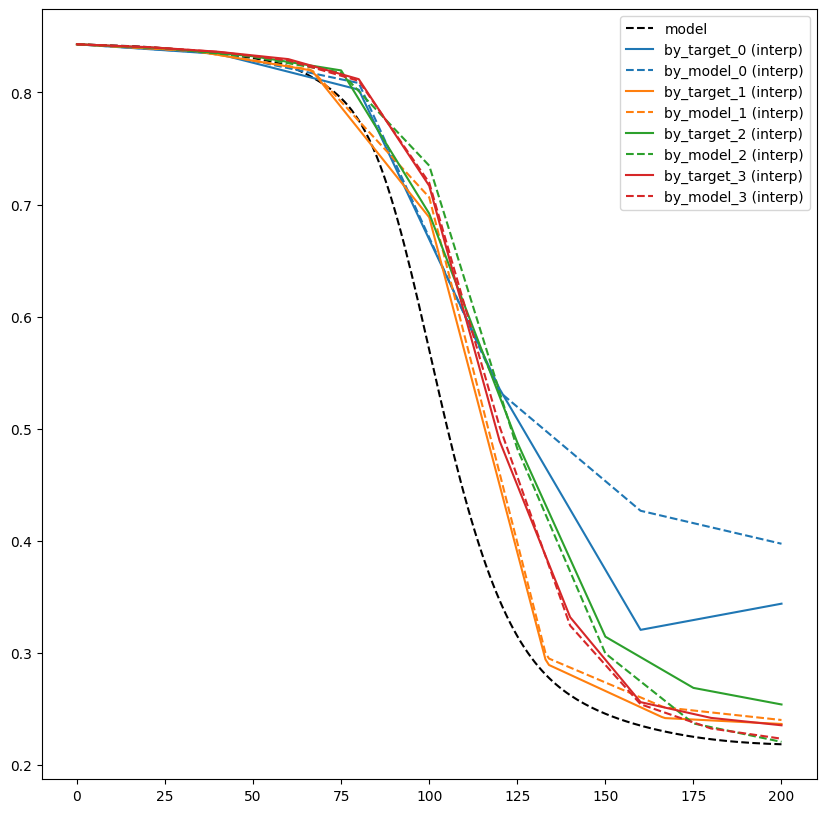

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def lin_interp_keep_ends(arr: np.ndarray, target_len: int) -> np.ndarray:
    """
    1-D 배열을 지정한 길이로 선형 보간합니다.
    첫 번째와 마지막 값(arr[0], arr[-1])은 그대로 유지합니다.
    """
    arr = np.asarray(arr)              # 보통 np.ndarray 이지만 안전 차원
    src_len = len(arr)

    # 이미 길이가 맞으면 복사만 반환
    if src_len == target_len:
        return arr.copy()

    # 원본/목표 위치 (0 ~ 1 구간으로 정규화)
    x_src = np.linspace(0, 1, src_len)
    x_tgt = np.linspace(0, 1, target_len)

    # 선형 보간
    out = np.interp(x_tgt, x_src, arr)

    # 끝점 값 확실히 고정
    out[0], out[-1] = arr[0], arr[-1]
    return out

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.figure(figsize=[10, 10])
#plt.plot(target_traj, color='k', linestyle='-', label='target')
plt.plot(model_traj,  color='k', linestyle='--', label='model')

for i, (bytarget_traj, bymodel_traj) in enumerate(zip(bytarget_trajs, bymodel_trajs)):
    bytarget_traj = lin_interp_keep_ends(bytarget_traj, len(target_traj))
    bymodel_traj  = lin_interp_keep_ends(bymodel_traj,  len(target_traj))
    c = colors[i % len(colors)]
    plt.plot(bytarget_traj, color=c, linestyle='-',  label=f'by_target_{i} (interp)')
    plt.plot(bymodel_traj,  color=c, linestyle='--', label=f'by_model_{i} (interp)')

plt.legend()
plt.show()
